## Load model saved

In [1]:
import joblib
import pandas as pd

# Load test data

df_test = pd.read_csv("Test_data/test_data.csv")
X = df_test.drop(columns=["cancer_type", "type"])
y = df_test['cancer_type']
display(X,y)

# Load model

bladder_model = joblib.load("Model_Saved/bladder.joblib")
brain_model = joblib.load("Model_Saved/brain.joblib")
breast_model = joblib.load("Model_Saved/breast.joblib")
colorectal_model = joblib.load("Model_Saved/colorectal.joblib")
gastric_model = joblib.load("Model_Saved/gastric.joblib")
leukemia_model = joblib.load("Model_Saved/leukemia.joblib")
liver_model = joblib.load("Model_Saved/liver.joblib")
lung_model = joblib.load("Model_Saved/lung.joblib")
pancreatic_model = joblib.load("Model_Saved/pancreatic.joblib")
prostate_model = joblib.load("Model_Saved/prostate.joblib")
renal_model = joblib.load("Model_Saved/renal.joblib")
throat_model = joblib.load("Model_Saved/throat.joblib")

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.601370,8.873161,9.214310,9.690334,4.341822,7.924622,6.482649,6.499633,5.368997,6.634785,...,11.330031,10.967963,13.693713,13.721795,5.254671,4.749096,3.968936,3.548965,4.554688,4.584465
1,12.921025,8.620507,7.238575,8.245388,3.682762,8.027397,7.575340,5.517496,6.761186,5.180190,...,12.758212,12.202741,13.985927,13.684496,5.013313,4.618019,3.963455,3.741682,4.617641,4.374241
2,11.046641,8.458561,6.425059,8.770478,6.532255,7.132320,7.857738,5.823012,4.491771,7.252599,...,13.100610,12.697922,14.362506,14.061722,4.950459,4.612189,4.010441,3.866341,4.471244,4.766970
3,12.369828,8.863015,6.623091,8.319927,4.084849,8.024815,7.981879,6.000366,5.452527,5.422245,...,12.482283,11.903074,13.991402,13.792137,4.936046,4.616858,3.701871,3.678101,4.555495,4.379911
4,11.299893,8.286180,6.993723,8.770720,4.026220,7.585630,7.870659,5.819242,4.631284,5.078618,...,13.276996,12.869971,14.476079,14.273778,5.100812,4.268341,3.989762,3.511990,4.644976,4.522790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,6.533818,3.095183,6.540493,6.361546,2.295276,4.636936,4.932149,2.955106,5.199770,2.495139,...,11.364050,10.985695,13.735517,13.364968,7.703983,3.172810,4.933504,2.236060,2.343445,2.220485
166,5.657621,3.159085,3.978410,7.174108,2.742771,4.937159,5.861396,3.510067,2.972037,2.756564,...,13.084227,12.915690,14.376607,14.033410,9.916877,3.746717,5.836157,2.485093,2.626120,2.635610
167,6.515137,2.979765,3.940801,7.209822,2.525715,4.822728,5.517274,3.495081,3.780623,2.694867,...,12.660566,12.586157,14.093004,13.682465,9.405094,3.729148,6.286082,2.287532,2.712309,2.546700
168,5.998170,3.165824,4.268922,7.198874,2.738943,4.721181,5.517444,3.193544,3.143453,2.709082,...,12.069660,12.057527,13.757772,13.404077,7.642801,3.296269,3.261484,2.447714,2.889734,2.746983


0        brain
1        brain
2       normal
3        brain
4       normal
        ...   
165    bladder
166    bladder
167     normal
168     normal
169     normal
Name: cancer_type, Length: 170, dtype: object

## Preproccessing test data

In [2]:
# Initialize a list to store results
results = []

# Iterate over each sample in the test dataset
for index, row in df_test.iterrows():
    try:
        # Align features for each model and preserve feature names
        sample_bladder = pd.DataFrame([row.loc[bladder_model.feature_names_in_].values],
                                      columns=bladder_model.feature_names_in_)
        sample_brain = pd.DataFrame([row.loc[brain_model.feature_names_in_].values],
                                    columns=brain_model.feature_names_in_)
        sample_breast = pd.DataFrame([row.loc[breast_model.feature_names_in_].values],
                                     columns=breast_model.feature_names_in_)
        sample_colorectal = pd.DataFrame([row.loc[colorectal_model.feature_names_in_].values],
                                         columns=colorectal_model.feature_names_in_)
        sample_gastric = pd.DataFrame([row.loc[gastric_model.feature_names_in_].values],
                                      columns=gastric_model.feature_names_in_)
        sample_leukemia = pd.DataFrame([row.loc[leukemia_model.feature_names_in_].values],
                                       columns=leukemia_model.feature_names_in_)
        sample_liver = pd.DataFrame([row.loc[liver_model.feature_names_in_].values],
                                    columns=liver_model.feature_names_in_)
        sample_lung = pd.DataFrame([row.loc[lung_model.feature_names_in_].values],
                                   columns=lung_model.feature_names_in_)
        sample_pancreatic = pd.DataFrame([row.loc[pancreatic_model.feature_names_in_].values],
                                         columns=pancreatic_model.feature_names_in_)
        sample_prostate = pd.DataFrame([row.loc[prostate_model.feature_names_in_].values],
                                       columns=prostate_model.feature_names_in_)
        sample_renal = pd.DataFrame([row.loc[renal_model.feature_names_in_].values],
                                    columns=renal_model.feature_names_in_)
        sample_throat = pd.DataFrame([row.loc[throat_model.feature_names_in_].values],
                                     columns=throat_model.feature_names_in_)

        # Get probability predictions for each model
        bladder_proba = bladder_model.predict_proba(sample_bladder)[0]
        brain_proba = brain_model.predict_proba(sample_brain)[0]
        breast_proba = breast_model.predict_proba(sample_breast)[0]
        colorectal_proba = colorectal_model.predict_proba(sample_colorectal)[0]
        gastric_proba = gastric_model.predict_proba(sample_gastric)[0]
        leukemia_proba = leukemia_model.predict_proba(sample_leukemia)[0]
        liver_proba = liver_model.predict_proba(sample_liver)[0]
        lung_proba = lung_model.predict_proba(sample_lung)[0]
        pancreatic_proba = pancreatic_model.predict_proba(sample_pancreatic)[0]
        prostate_proba = prostate_model.predict_proba(sample_prostate)[0]
        renal_proba = renal_model.predict_proba(sample_renal)[0]
        throat_proba = throat_model.predict_proba(sample_throat)[0]

        # Store the results
        result = {
            'sample_index': index,
            'bladder_proba': bladder_proba.tolist(),
            'brain_proba': brain_proba.tolist(),
            'breast_proba': breast_proba.tolist(),
            'colorectal_proba': colorectal_proba.tolist(),
            'gastric_proba': gastric_proba.tolist(),
            'leukemia_proba': leukemia_proba.tolist(),
            'liver_proba': liver_proba.tolist(),
            'lung_proba': lung_proba.tolist(),
            'pancreatic_proba': pancreatic_proba.tolist(),
            'prostate_proba': prostate_proba.tolist(),
            'renal_proba': renal_proba.tolist(),
            'throat_proba': throat_proba.tolist(),
            'true_label': y.iloc[index]
        }
        results.append(result)
    except Exception as e:
        print(f"Error processing sample at index {index}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("Result/prediction_results.csv", index=False)

print("Predicted probabilities saved to 'Result/prediction_results.csv'.")

Predicted probabilities saved to 'Result/prediction_results.csv'.


In [3]:
# Split probabilities into separate columns for clarity, selecting only class 1 probabilities
results_cleaned = []
for result in results:
    try:
        bladder_proba_class_1 = result['bladder_proba'][1]
        brain_proba_class_1 = result['brain_proba'][1]
        breast_proba_class_1 = result['breast_proba'][1]
        colorectal_proba_class_1 = result['colorectal_proba'][1]
        gastric_proba_class_1 = result['gastric_proba'][1]
        leukemia_proba_class_1 = result['leukemia_proba'][1]
        liver_proba_class_1 = result['liver_proba'][1]
        lung_proba_class_1 = result['lung_proba'][1]
        pancreatic_proba_class_1 = result['pancreatic_proba'][1]
        prostate_proba_class_1 = result['prostate_proba'][1]
        renal_proba_class_1 = result['renal_proba'][1]
        throat_proba_class_1 = result['throat_proba'][1]
        
        results_cleaned.append({
            'sample_index': result['sample_index'],
            'bladder': bladder_proba_class_1,
            'brain': brain_proba_class_1,
            'breast': breast_proba_class_1,
            'colorectal': colorectal_proba_class_1,
            'gastric': gastric_proba_class_1,
            'leukemia': leukemia_proba_class_1,
            'liver': liver_proba_class_1,
            'lung': lung_proba_class_1,
            'pancreatic': pancreatic_proba_class_1,
            'prostate': prostate_proba_class_1,
            'renal': renal_proba_class_1,
            'throat': throat_proba_class_1,
            'true_label': result['true_label']
        })
    except Exception as e:
        print(f"Error processing result at sample_index {result['sample_index']}: {e}")

# Convert cleaned results to DataFrame
results_cleaned_df = pd.DataFrame(results_cleaned)

# Save the cleaned results to a new CSV file
results_cleaned_df.to_csv("Result/prediction_results_cleaned.csv", index=False)

print("Cleaned predicted probabilities (class 1) saved to 'Result/prediction_results_cleaned.csv'.")


Cleaned predicted probabilities (class 1) saved to 'Result/prediction_results_cleaned.csv'.


In [4]:
import pandas as pd

result = pd.read_csv("Result/prediction_results_cleaned.csv")
model_result = result.iloc[:, 1:-1]
result['predict'] = model_result.idxmax(axis=1)

result.to_csv("System_Result.csv", index=False)

display(result.head())


,sample_index,bladder,brain,breast,colorectal,gastric,leukemia,liver,lung,pancreatic,prostate,renal,throat,true_label,predict
0,0,0.039050,0.89,0.001384,0.005060,0.006241,0.012571,0.00,0.058720,0.0,0.003112,0.012197,0.19,brain,brain
1,1,0.014241,0.98,0.002779,0.000158,0.004866,0.004995,0.00,0.048179,0.0,0.001971,0.009817,0.00,brain,brain
2,2,0.080049,0.38,0.000305,0.002335,0.004227,0.010467,0.01,0.000545,0.0,0.015566,0.000325,0.03,normal,brain
3,3,0.037527,0.97,0.002624,0.002138,0.008483,0.004691,0.03,0.059003,0.0,0.007100,0.001334,0.04,brain,brain
4,4,0.081047,0.76,0.000428,0.000764,0.005668,0.011818,0.02,0.013523,0.0,0.015651,0.003824,0.06,normal,brain


In [5]:
# Define a minimum threshold
threshold = 0.5

# Identify the column with the highest value
result['max_proba'] = model_result.max(axis=1)
result['predict'] = model_result.idxmax(axis=1)

# Apply threshold filtering
result['predict'] = result.apply(
    lambda row: 'normal' if row['max_proba'] < threshold else row['predict'],
    axis=1
)

display(result)


,sample_index,bladder,brain,breast,colorectal,gastric,leukemia,liver,lung,pancreatic,prostate,renal,throat,true_label,predict,max_proba
0,0,0.039050,0.89,0.001384,0.005060,0.006241,0.012571,0.00,0.058720,0.00,0.003112,0.012197,0.19,brain,brain,0.890000
1,1,0.014241,0.98,0.002779,0.000158,0.004866,0.004995,0.00,0.048179,0.00,0.001971,0.009817,0.00,brain,brain,0.980000
2,2,0.080049,0.38,0.000305,0.002335,0.004227,0.010467,0.01,0.000545,0.00,0.015566,0.000325,0.03,normal,normal,0.380000
3,3,0.037527,0.97,0.002624,0.002138,0.008483,0.004691,0.03,0.059003,0.00,0.007100,0.001334,0.04,brain,brain,0.970000
4,4,0.081047,0.76,0.000428,0.000764,0.005668,0.011818,0.02,0.013523,0.00,0.015651,0.003824,0.06,normal,brain,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,165,0.926267,0.21,0.029924,0.274726,0.724461,0.071561,0.43,0.005716,0.66,0.018430,0.015140,0.00,bladder,bladder,0.926267
166,166,0.982727,0.15,0.410066,0.197144,0.008562,0.381867,0.39,0.263194,0.24,0.053337,0.012717,0.02,bladder,bladder,0.982727
167,167,0.982100,0.18,0.386269,0.174864,0.439039,0.269266,0.41,0.135814,0.31,0.049057,0.028600,0.02,normal,bladder,0.982100
168,168,0.979633,0.17,0.081444,0.228762,0.450242,0.384707,0.41,0.241153,0.20,0.039974,0.013516,0.02,normal,bladder,0.979633


In [6]:
from sklearn.metrics import classification_report

# Extract true labels and predictions
true_labels = result['true_label']
predictions = result['predict']

# Generate the classification report
report = classification_report(true_labels, predictions, output_dict=False)

# Display the classification report
print(report)

              precision    recall  f1-score   support

     bladder       0.62      1.00      0.77         5
       brain       0.93      0.87      0.90        15
      breast       0.94      1.00      0.97        30
  colorectal       1.00      1.00      1.00        17
     gastric       0.50      1.00      0.67         2
    leukemia       0.80      1.00      0.89         4
       liver       1.00      1.00      1.00         9
        lung       0.85      1.00      0.92        11
      normal       1.00      0.67      0.80        52
  pancreatic       0.80      1.00      0.89         4
    prostate       0.83      1.00      0.91         5
       renal       0.75      1.00      0.86         6
      throat       0.71      1.00      0.83        10

    accuracy                           0.89       170
   macro avg       0.83      0.96      0.88       170
weighted avg       0.92      0.89      0.89       170



In [8]:
# Display keys for debugging
print("Keys in result:", result.keys())

true_label_key = 'true_label' 
predict_key = 'predict'      

# Ensure the keys exist
if true_label_key in result and predict_key in result:
    # Create a new dictionary or DataFrame for binary classifications
    binary_results = {
        'sample_index': result['sample_index'],
        'true_label': result[true_label_key],
        'predict': result[predict_key],
        'binary_true_label': [0 if label == 'normal' else 1 for label in result[true_label_key]],
        'binary_predict': [0 if pred == 'normal' else 1 for pred in result[predict_key]]
    }

    # Convert to a DataFrame for analysis
    binary_results_df = pd.DataFrame(binary_results)

    # Generate the classification report
    binary_true_labels = binary_results_df['binary_true_label']
    binary_predictions = binary_results_df['binary_predict']
    report = classification_report(binary_true_labels, binary_predictions, target_names=["Normal", "Cancer"], output_dict=False)

    # Calculate accuracy
    accuracy = (binary_results_df['binary_true_label'] == binary_results_df['binary_predict']).mean()

    # Save updated results with binary columns to a new CSV file
    binary_results_df.to_csv("Result/binary_prediction_results.csv", index=False)

    # Display the classification report and accuracy
    print(report)
    print(f"Accuracy: {accuracy:.2%}")
    print("Updated results with binary classifications saved to 'Result/binary_prediction_results.csv'.")
else:
    print(f"Error: Required keys '{true_label_key}' and/or '{predict_key}' not found in the result.")


Keys in result: Index(['sample_index', 'bladder', 'brain', 'breast', 'colorectal', 'gastric',
       'leukemia', 'liver', 'lung', 'pancreatic', 'prostate', 'renal',
       'throat', 'true_label', 'predict', 'max_proba'],
      dtype='object')
              precision    recall  f1-score   support

      Normal       1.00      0.67      0.80        52
      Cancer       0.87      1.00      0.93       118

    accuracy                           0.90       170
   macro avg       0.94      0.84      0.87       170
weighted avg       0.91      0.90      0.89       170

Accuracy: 90.00%
Updated results with binary classifications saved to 'Result/binary_prediction_results.csv'.


Accuracy: 90.00%
              precision    recall  f1-score  support
Normal         1.000000  0.673077  0.804598     52.0
Cancer         0.874074  1.000000  0.932806    118.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.937037  0.836538  0.868702    170.0
weighted avg   0.912593  0.900000  0.893590    170.0


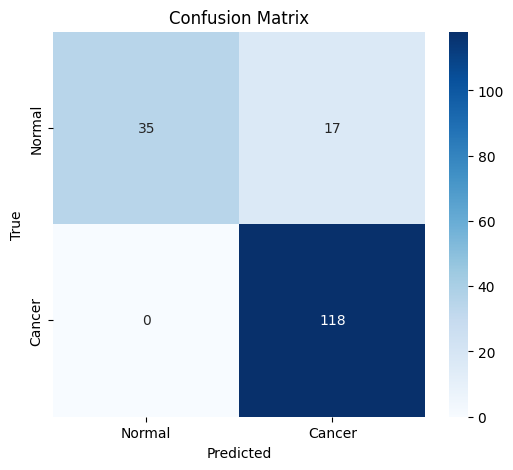

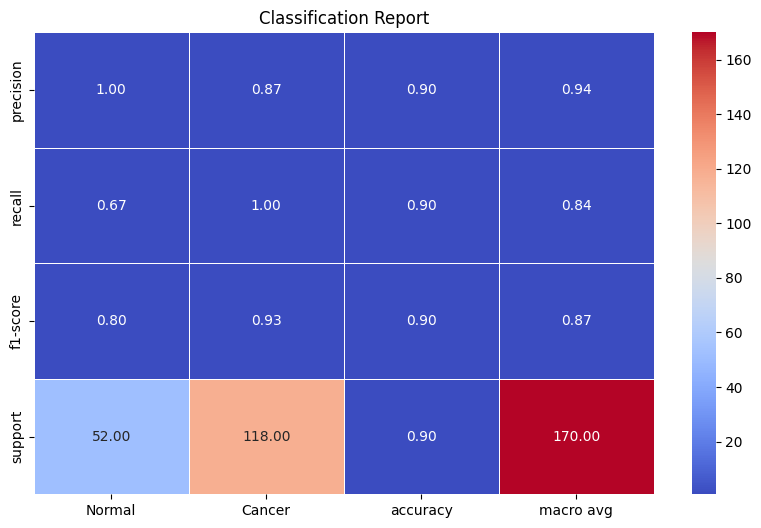

2024-12-02 14:27:15.310 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.593 
  command:

    streamlit run c:\Study\CS_539\Cancer_Detector\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-02 14:27:15.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:27:15.600 Thread 'Ma

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'result' contains necessary keys
true_label_key = 'true_label'  # Update if different
predict_key = 'predict'       # Update if different

if true_label_key in result and predict_key in result:
    # Create binary classifications
    binary_results = {
        'sample_index': result['sample_index'],
        'true_label': result[true_label_key],
        'predict': result[predict_key],
        'binary_true_label': [0 if label == 'normal' else 1 for label in result[true_label_key]],
        'binary_predict': [0 if pred == 'normal' else 1 for pred in result[predict_key]]
    }

    # Convert to DataFrame
    binary_results_df = pd.DataFrame(binary_results)

    # Generate classification report
    binary_true_labels = binary_results_df['binary_true_label']
    binary_predictions = binary_results_df['binary_predict']
    report = classification_report(binary_true_labels, binary_predictions, target_names=["Normal", "Cancer"], output_dict=True)

    # Calculate accuracy
    accuracy = (binary_results_df['binary_true_label'] == binary_results_df['binary_predict']).mean()

    # Save to CSV
    binary_results_df.to_csv("binary_prediction_results.csv", index=False)

    # Display Results
    print(f"Accuracy: {accuracy:.2%}")
    print(pd.DataFrame(report).transpose())

    # Visualization
    # 1. Confusion Matrix
    cm = confusion_matrix(binary_true_labels, binary_predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Cancer"], yticklabels=["Normal", "Cancer"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # 2. Classification Report as a Heatmap
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Classification Report')
    plt.show()

    # Display DataFrame as a Table (Optional for Streamlit)
    try:
        import streamlit as st
        st.title("Binary Classification Results")
        st.markdown(f"**Accuracy:** {accuracy:.2%}")
        st.dataframe(binary_results_df.head(10))  # Display first 10 rows
        st.write("### Confusion Matrix")
        st.pyplot()
        st.write("### Classification Report")
        st.pyplot()
    except ImportError:
        print("Streamlit is not installed. Visualization shown using Matplotlib.")

else:
    print(f"Error: Required keys '{true_label_key}' and/or '{predict_key}' not found in the result.")


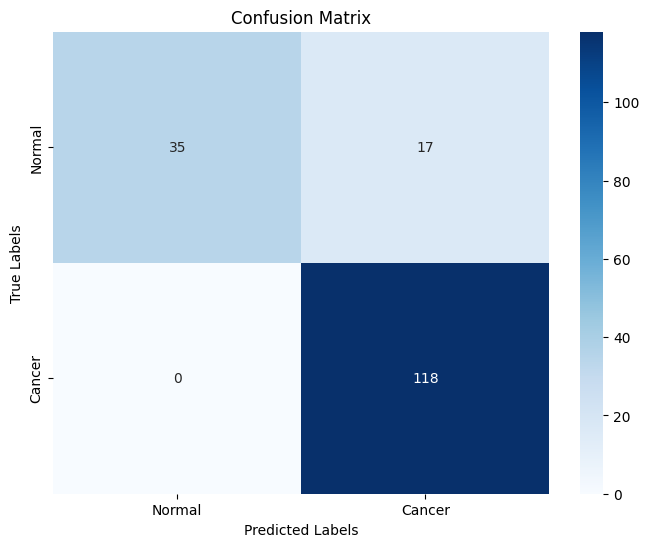

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(binary_true_labels, binary_predictions)

# Labels for confusion matrix axes
labels = ["Normal", "Cancer"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


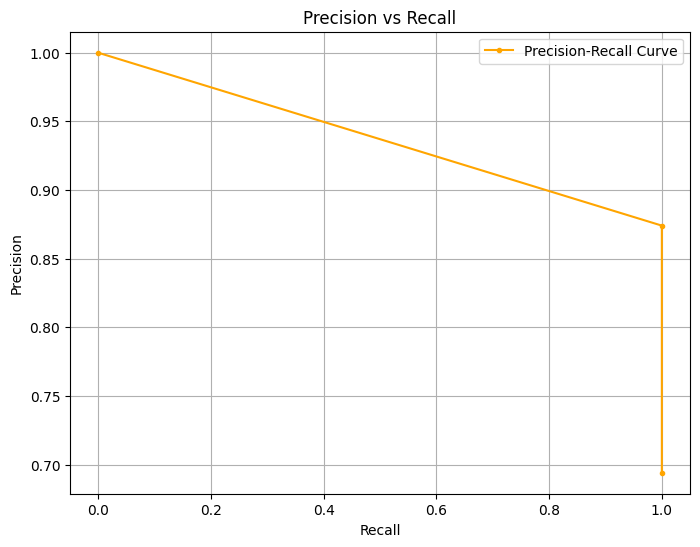

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(binary_true_labels, binary_predictions)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve', color = 'orange')
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()


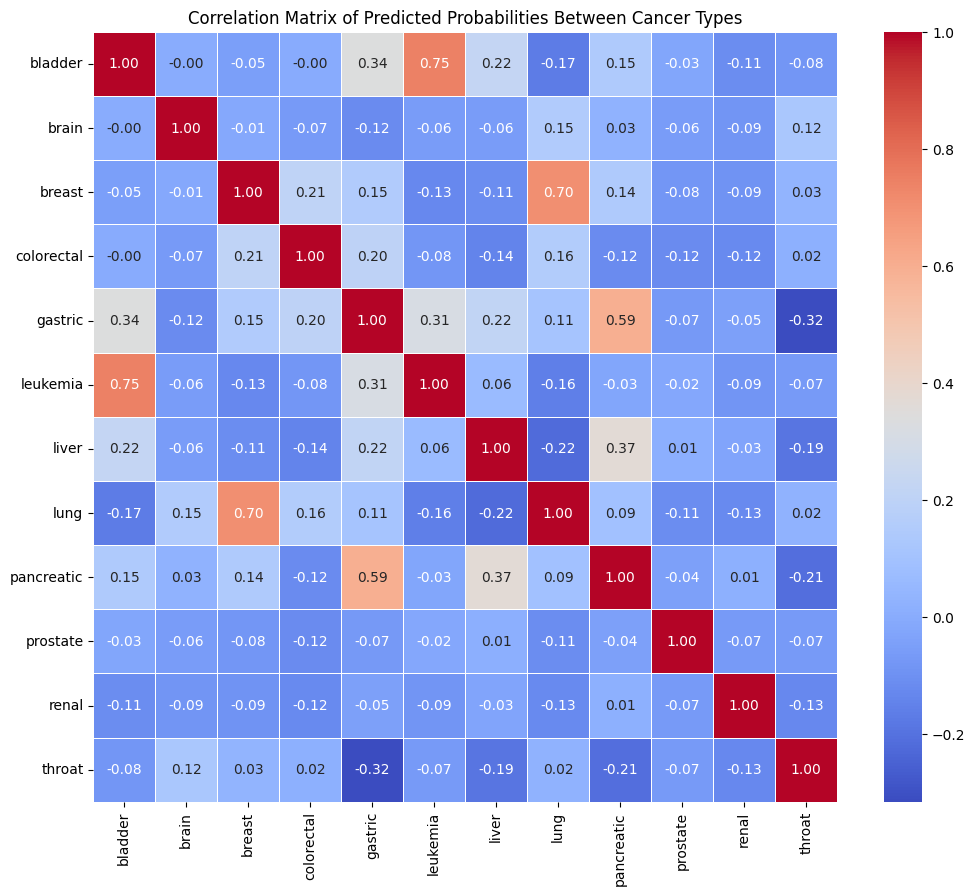

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Result/prediction_results_cleaned.csv")

# Select only the columns corresponding to cancer types (exclude 'sample_index' and 'true_label')
cancer_types = data.columns[1:-1]  # Exclude 'sample_index' and 'true_label'

# Compute the correlation matrix
correlation_matrix = data[cancer_types].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Predicted Probabilities Between Cancer Types")
plt.show()


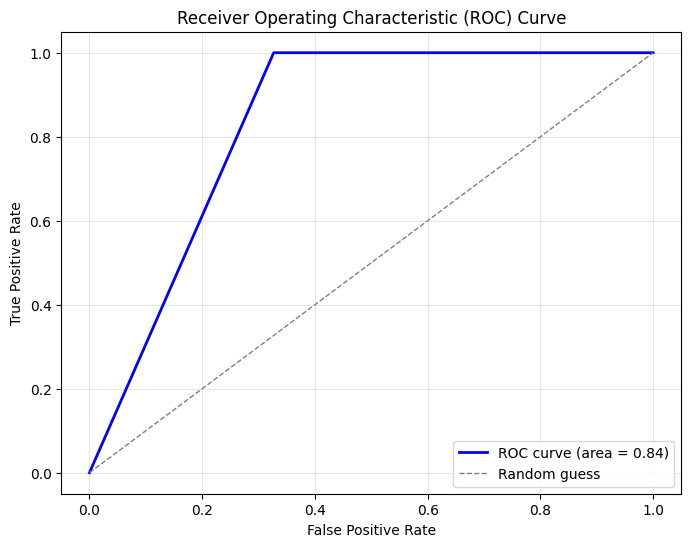

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the uploaded file
file_path = 'Result/binary_prediction_results.csv'
data = pd.read_csv(file_path)

# Check the columns to identify ground truth and predicted probabilities
data.head()
# Extract true labels and predictions
y_true = data['binary_true_label']
y_pred = data['binary_predict']

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


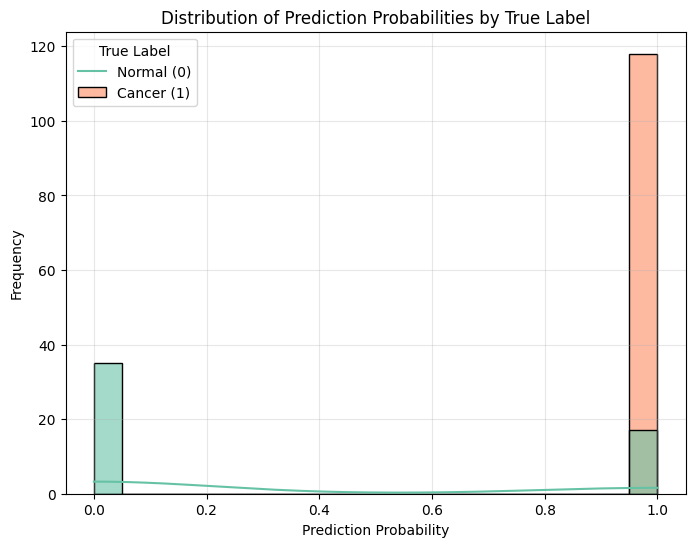

In [5]:
# Visualizing the distribution of prediction probabilities for binary classes
plt.figure(figsize=(8, 6))

# Plot histograms of predicted probabilities for each class
sns.histplot(
    data=data,
    x="binary_predict",
    hue="binary_true_label",
    bins=20,
    kde=True,
    palette="Set2",
    alpha=0.6
)

plt.title("Distribution of Prediction Probabilities by True Label")
plt.xlabel("Prediction Probability")
plt.ylabel("Frequency")
plt.legend(title="True Label", labels=["Normal (0)", "Cancer (1)"])
plt.grid(alpha=0.3)
plt.show()
